In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import json

In [2]:
with open('toc_files.json','r') as infile:
    co2_dict = json.load(infile)

In [3]:
def get_df(dir_path):
    pqfile = dir_path / 'rad_spectrum.pq'
    df = pd.read_parquet(pqfile)
    return df

['0', '10', '100', '1000']


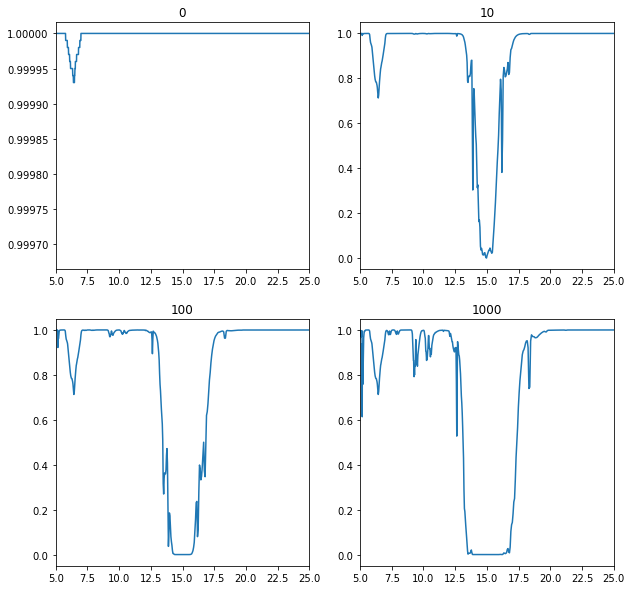

In [5]:
fig, axarray = plt.subplots(2,2,figsize=(10,10))
axlist = axarray.flat
key_list = list(co2_dict.keys())
key_list.sort()
print(key_list)
for key, ax in zip(key_list,axlist):
    dir_name = Path(co2_dict[key])
    df = get_df(dir_name)
    ax.plot('wavlen_um','total_trans',data=df)
    ax.set_title(key)
    ax.set_xlim([5,25])
plt.show()


Index(['freq_invcm', 'wavlen_um', 'path_thermal_cm', 'path_thermal_mum',
       'surface_emission_cm', 'surface_emission_umu', 'surface_reflected_cm',
       'surface_reflected_mum', 'total_radiance_cm', 'total_radiance_mum',
       'integral_cm', 'total_trans'],
      dtype='object')
['0', '10', '100', '1000']


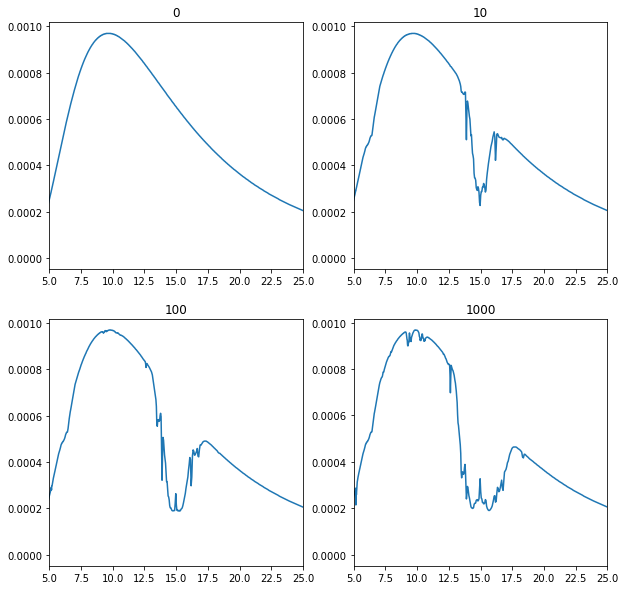

In [6]:
print(df.columns)
fig, axarray = plt.subplots(2,2,figsize=(10,10))
axlist = axarray.flat
key_list = list(co2_dict.keys())
key_list.sort()
print(key_list)
for key, ax in zip(key_list,axlist):
    dir_name = Path(co2_dict[key])
    df = get_df(dir_name)
    ax.plot('wavlen_um','total_radiance_mum',data=df)
    ax.set_title(key)
    ax.set_xlim([5,25])
plt.show()


mol_prof Index(['i', 'z', 'p', 't', 'h2o', 'o3', 'co2', 'co', 'ch4', 'n2o', 'o2', 'nh3',
       'no', 'no2', 'so2'],
      dtype='object')
aero_prof Index(['i', 'z', 'p', 't', 'cntmfrn', 'hno3', 'aerosol_1', 'aerosol_2',
       'aerosol_3', 'aerosol_4', 'aer1*rh', 'cirrus', 'rh'],
      dtype='object')
o3_prof Index(['i', 'z', 'p', 't', 'n2', 'cntmslf', 'mol_scat', 'n-1', 'o3', 'o2'], dtype='object')


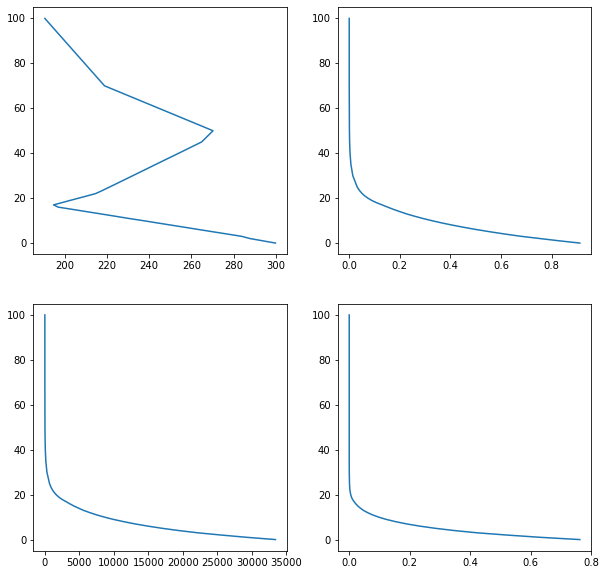

In [8]:
the_dir = co2_dict['1000']
keep_profs = dict()
profs=['mol_prof.pq','aero_prof.pq','o3_prof.pq']
for a_prof in profs:
    the_file = Path(the_dir) / a_prof
    key=the_file.stem
    keep_profs[key] = pd.read_parquet(the_file)
for key, value in keep_profs.items():
    print(key,value.columns)

    
fig, axarray = plt.subplots(2,2,figsize=(10,10))
height = keep_profs['mol_prof']['z']
h2o = keep_profs['mol_prof']['h2o']
axlist = axarray.flat
axlist[0].plot('t','z',data=keep_profs['o3_prof']);
axlist[1].plot('mol_scat','z', data = keep_profs['o3_prof'])
axlist[2].plot('o2','z', data = keep_profs['o3_prof'])
axlist[3].plot('n2','z', data = keep_profs['o3_prof']);